# Data Preprocessing

The goal of this lab is to introduce you to data preprocessing techniques in order to make your data suitable for applying a learning algorithm.

## 1. Handling Missing Values

A common (and very unfortunate) data property is the ocurrence of missing and erroneous values in multiple features in datasets. For this exercise we will be using a data set about abalone snails.
The data set is contained in the Zip file you downloaded from Moodle.

To determine the age of a abalone snail you have to kill the snail and count the annual
rings. You are told to estimate the age of a snail on the basis of the following attributes:
1. type: male (0), female (1) and infant (2)
2. length in mm
3. width in mm
4. height in mm
5. total weight in grams
6. weight of the meat in grams
7. drained weight in grams
8. weight of the shell in grams
9. number of annual rings (number of rings +1, 5 yields age)

However, the data is incomplete. Missing values are marked with −1.

In [34]:
import pandas as pd
# load data 
df = pd.read_csv("http://www.cs.uni-potsdam.de/ml/teaching/ss15/ida/uebung02/abalone.csv")
df.columns=['type','length','width','height','total_weight','meat_weight','drained_weight','shell_weight','num_rings']
df.head()

,type,length,width,height,total_weight,meat_weight,drained_weight,shell_weight,num_rings
0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,-1
1,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,2,-1.000,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [35]:
df.mean()

type              0.912835
length            0.478448
width             0.366148
height            0.105771
total_weight      0.782421
meat_weight       0.318576
drained_weight    0.149442
shell_weight      0.208351
num_rings         9.662835
dtype: float64

### Exercise 1.1

Compute the mean of of each numeric column and the counts of each categorical column, excluding the missing values.

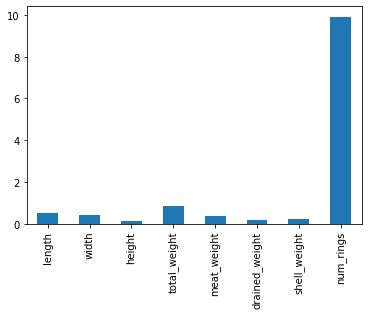

In [36]:
##################
##################
Numcolumns=['length','width','height','total_weight','meat_weight','drained_weight','shell_weight','num_rings']
def findmean(column):
    sum = 0
    count = 0
    for i in range(len(column)):
        if column[i] != -1:
            sum = sum + column[i]
            count = count + 1
            
    return sum/count
            
        
info = df[Numcolumns].apply(lambda col: findmean(col))
info
info.plot(kind='bar')

4089

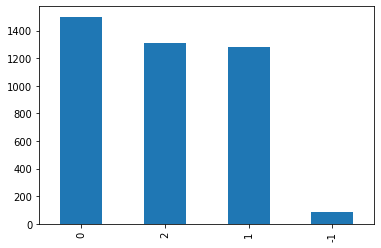

In [37]:
df['type'].value_counts().plot(kind='bar')
type = df['type'].astype(int)
type.where(type > -1).count()


### Exercise 1.2

Compute the median of each numeric column,  excluding the missing values.

length            0.54500
width             0.42500
height            0.14000
total_weight      0.80175
meat_weight       0.33600
drained_weight    0.17050
shell_weight      0.23350
num_rings         9.00000
dtype: float64

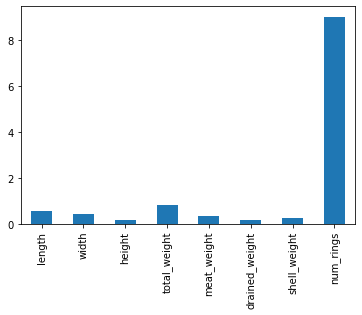

In [40]:
##################
#INSERT CODE HERE#
##################
import statistics

Numcolumns=['length','width','height','total_weight','meat_weight','drained_weight','shell_weight','num_rings']
def findmed(column):
    lst = []
    
    for i in range(len(column)):
        if column[i] != -1:
            lst.append(column[i])
           
    #print(lst)     
    return  statistics.median(lst)
            
        
medians = df[Numcolumns].apply(lambda col: findmed(col))
medians.plot(kind='bar')
#medians['length']
medians

### Exercise 1.3

Handle the missing values in a way that you find suitable. Argue your choices.

In [31]:

# drop rows where type = -1
df.count()
# Get names of indexes for which column type has value -1
indexNames = df[ df['type'] == -1 ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
df.count()
#Numcolumns=['length','width','height','total_weight','meat_weight','drained_weight','shell_weight','num_rings']

#df.loc[df[col] > 1990, col] = 

type              4089
length            4089
width             4089
height            4089
total_weight      4089
meat_weight       4089
drained_weight    4089
shell_weight      4089
num_rings         4089
dtype: int64

In [42]:
##################
#Median - Mean can be dominated by outliers 
##################
numcolumns=['length','width','height','total_weight','meat_weight','drained_weight','shell_weight','num_rings']
for col in numcolumns:
    df.loc[df[col] == -1, col] = medians[col]
    #print(medians[col])


In [43]:
df.head()

,type,length,width,height,total_weight,meat_weight,drained_weight,shell_weight,num_rings
0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,9.0
1,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
2,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
3,2,0.545,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8.0


### Exercise 1.4

Perform Z-score normalization on every column (except the type of course!)

In [44]:
##################
#INSERT CODE HERE#
##################
#  iterate over the remaining columns and create a new zscore column
for col in numcolumns:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
df.head()

,type,length,width,height,total_weight,meat_weight,drained_weight,shell_weight,num_rings,length_zscore,width_zscore,height_zscore,total_weight_zscore,meat_weight_zscore,drained_weight_zscore,shell_weight_zscore,num_rings_zscore
0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,9.0,-1.470758,-1.466108,-1.207488,-1.246759,-1.181599,-1.218783,-1.226142,-0.281953
1,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0,0.047882,0.117919,-0.112463,-0.312706,-0.465523,-0.356792,-0.207267,-0.281953
2,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0,-0.711438,-0.444155,-0.355802,-0.645779,-0.652524,-0.611682,-0.607539,0.031361
3,2,0.545,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0,0.174435,-1.568303,-1.450827,-1.289169,-1.227209,-1.302202,-1.335307,-0.908582
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8.0,-0.837991,-1.108424,-1.085819,-0.986093,-0.992318,-0.949990,-0.862258,-0.595268


## 2. Preprocessing text (Optional)

One possible way to transform text documents into vectors of numeric attributes is to use the TF-IDF representation. We will experiment with this representation using the 20 Newsgroup data set. The data set contains postings on 20 different topics. The classification problem is to decide which of the topics a posting falls into. Here, we will only consider postings about medicine and space.

In [1]:
from sklearn.datasets import fetch_20newsgroups


categories = ['sci.med', 'sci.space']
raw_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
print(f'The index of each category is: {[(i,target) for i,target in enumerate(raw_data.target_names)]}')

The index of each category is: [(0, 'sci.med'), (1, 'sci.space')]


Check out some of the postings, might find some funny ones!

In [2]:
import numpy as np
idx = np.random.randint(0, len(raw_data.data))
print (f'This is a {raw_data.target_names[raw_data.target[idx]]} email.\n')
print (f'There are {len(raw_data.data)} emails.\n')
print(raw_data.data[idx])

This is a sci.med email.

There are 1187 emails.

From: mmm@cup.portal.com (Mark Robert Thorson)
Subject: Re: Barbecued foods and health risk
Organization: The Portal System (TM)
Lines: 72

This reminds me of the last Graham Kerr cooking show I saw.  Today he
smoked meat on the stovetop in a big pot!  He used a strange technique
I'd never seen before.

He took a big pot with lid, and placed a tray in it made from aluminum foil.
The tray was about the size and shape of a typical coffee-table ash tray,
made by crumpling a sheet of foil around the edges.

In the tray, he placed a couple spoonfuls of brown sugar, a similar
quantity of brown rice (he said any rice will do), the contents of two
teabags of Earl Grey tea, and a few cloves.

On top of this was placed an ordinary aluminum basket-type steamer, with
two chicken breasts in it.  The lid was put on, and the whole assembly
went on the stovetop at high heat for 10 or 12 minutes.

Later, he removed what looked like smoked chicken breast

Lets pick the first 10 postings from each category

In [4]:
idxs_med = np.flatnonzero(raw_data.target == 0)
idxs_space = np.flatnonzero(raw_data.target == 1)
idxs = np.concatenate([idxs_med[:10],idxs_space[:10]])
data = np.array(raw_data.data)
data = data[idxs]
data

array(['From: geb@cs.pitt.edu (Gordon Banks)\nSubject: Re: Striato Nigral Degeneration\nReply-To: geb@cs.pitt.edu (Gordon Banks)\nOrganization: Univ. of Pittsburgh Computer Science\nLines: 16\n\nIn article <9303252134.AA09923@walrus.mvhs.edu> ktodd@walrus.mvhs.edu ((Ken Todd)) writes:\n>I would like any information available on this rare disease.  I understand\n>that an operation referred to as POLLIDOTOMY may be in order.  Does anyone\n>know of a physician that performs this procedure.  All responses will be\n>appreciated.  Please respond via email to ktodd@walrus.mvhs.edu\n\nIt isn\'t that rare, actually.  Many cases that are called Parkinson\'s\nDisease turn out on autopsy to be SND.  It should be suspected in any\ncase of Parkinsonism without tremor and which does not respond to\nL-dopa therapy.  I don\'t believe pallidotomy will do much for SND.\n\n-- \n----------------------------------------------------------------------------\nGordon Banks  N3JXP      | "Skepticism is the chast

<a href="http://www.nltk.org/">NLTK</a> is a toolkit for natural language processing. Take some time to install it and go through this <a href="http://www.slideshare.net/japerk/nltk-in-20-minutes">short tutorial/presentation</a>.

The downloaded package below is a tokenizer that divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.

In [6]:
import nltk
import itertools
nltk.download('punkt')

# Tokenize the sentences into words
tokenized_sentences = [nltk.word_tokenize(sent) for sent in data]
vocabulary_size = 1000
unknown_token = 'unknown'
tokenized_sentences

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\96ank\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['From',
  ':',
  'geb',
  '@',
  'cs.pitt.edu',
  '(',
  'Gordon',
  'Banks',
  ')',
  'Subject',
  ':',
  'Re',
  ':',
  'Striato',
  'Nigral',
  'Degeneration',
  'Reply-To',
  ':',
  'geb',
  '@',
  'cs.pitt.edu',
  '(',
  'Gordon',
  'Banks',
  ')',
  'Organization',
  ':',
  'Univ',
  '.',
  'of',
  'Pittsburgh',
  'Computer',
  'Science',
  'Lines',
  ':',
  '16',
  'In',
  'article',
  '<',
  '9303252134.AA09923',
  '@',
  'walrus.mvhs.edu',
  '>',
  'ktodd',
  '@',
  'walrus.mvhs.edu',
  '(',
  '(',
  'Ken',
  'Todd',
  ')',
  ')',
  'writes',
  ':',
  '>',
  'I',
  'would',
  'like',
  'any',
  'information',
  'available',
  'on',
  'this',
  'rare',
  'disease',
  '.',
  'I',
  'understand',
  '>',
  'that',
  'an',
  'operation',
  'referred',
  'to',
  'as',
  'POLLIDOTOMY',
  'may',
  'be',
  'in',
  'order',
  '.',
  'Does',
  'anyone',
  '>',
  'know',
  'of',
  'a',
  'physician',
  'that',
  'performs',
  'this',
  'procedure',
  '.',
  'All',
  'responses',
  'will

In [7]:
# Count the word frequencies
word_freq = nltk.FreqDist(itertools.chain(*tokenized_sentences))
print (f"Found {len(word_freq.items())} unique words tokens.")

Found 1641 unique words tokens.


In [8]:
# Get the most common words and build index_to_word and word_to_index vectors
vocab = word_freq.most_common(vocabulary_size-1)
index_to_word = [x[0] for x in vocab]
index_to_word.append(unknown_token)
word_to_index = dict([(w,i) for i,w in enumerate(index_to_word)])
 
print (f"Using vocabulary size {vocabulary_size}." )
print (f"The least frequent word in our vocabulary is '{vocab[-1][0]}' and appeared {vocab[-1][1]} times.")
index_to_word

Using vocabulary size 1000.
The least frequent word in our vocabulary is 'REASONS' and appeared 1 times.


[':',
 '.',
 ',',
 '--',
 '>',
 'the',
 ')',
 'to',
 '(',
 'of',
 '@',
 'a',
 'and',
 'I',
 'that',
 'is',
 'in',
 'it',
 'be',
 '?',
 'for',
 '!',
 'this',
 "n't",
 'are',
 "'s",
 'From',
 'do',
 'Subject',
 'Organization',
 'Lines',
 "''",
 'on',
 'have',
 'as',
 'not',
 '``',
 'you',
 'In',
 'an',
 'was',
 'we',
 'Re',
 'The',
 '-',
 '<',
 'would',
 'if',
 'o',
 'writes',
 'will',
 'It',
 'but',
 'or',
 'they',
 'Space',
 'article',
 'may',
 'with',
 'food',
 'by',
 'what',
 '...',
 'see',
 'like',
 'should',
 'can',
 'there',
 'some',
 'about',
 'at',
 'know',
 'up',
 'who',
 'Griffin',
 'out',
 'which',
 'Is',
 'diet',
 'one',
 'inflammation',
 'used',
 'stage',
 'any',
 'does',
 'Crohn',
 'has',
 'things',
 'But',
 'my',
 'them',
 'more',
 '3',
 'all',
 '*',
 'space',
 '$',
 'billion',
 'Reply-To',
 'Ken',
 'anyone',
 'their',
 "'d",
 'cause',
 'problems',
 'Steve',
 'because',
 'been',
 'told',
 'doctor',
 'now',
 'had',
 'good',
 'anything',
 'point',
 'when',
 'think',
 'just'

In [12]:
word_to_index

{':': 0,
 '.': 1,
 ',': 2,
 '--': 3,
 '>': 4,
 'the': 5,
 ')': 6,
 'to': 7,
 '(': 8,
 'of': 9,
 '@': 10,
 'a': 11,
 'and': 12,
 'I': 13,
 'that': 14,
 'is': 15,
 'in': 16,
 'it': 17,
 'be': 18,
 '?': 19,
 'for': 20,
 '!': 21,
 'this': 22,
 "n't": 23,
 'are': 24,
 "'s": 25,
 'From': 26,
 'do': 27,
 'Subject': 28,
 'Organization': 29,
 'Lines': 30,
 "''": 31,
 'on': 32,
 'have': 33,
 'as': 34,
 'not': 35,
 '``': 36,
 'you': 37,
 'In': 38,
 'an': 39,
 'was': 40,
 'we': 41,
 'Re': 42,
 'The': 43,
 '-': 44,
 '<': 45,
 'would': 46,
 'if': 47,
 'o': 48,
 'writes': 49,
 'will': 50,
 'It': 51,
 'but': 52,
 'or': 53,
 'they': 54,
 'Space': 55,
 'article': 56,
 'may': 57,
 'with': 58,
 'food': 59,
 'by': 60,
 'what': 61,
 '...': 62,
 'see': 63,
 'like': 64,
 'should': 65,
 'can': 66,
 'there': 67,
 'some': 68,
 'about': 69,
 'at': 70,
 'know': 71,
 'up': 72,
 'who': 73,
 'Griffin': 74,
 'out': 75,
 'which': 76,
 'Is': 77,
 'diet': 78,
 'one': 79,
 'inflammation': 80,
 'used': 81,
 'stage': 82,
 '

### Exercise 2.1

Code your own TF-IDF representation function and use it on this dataset. (Don't use code from libraries. Build your own function with Numpy/Pandas). Use the formular TFIDF = TF * (IDF+1). The effect of adding “1” to the idf in the equation above is that terms with zero idf, i.e., terms that occur in all documents in a training set, will not be entirely ignored. The term frequency is the raw count of a term in a document. The inverse document frequency is the natural logarithm of the inverse fraction of the documents that contain the word.

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer()
df = pd.DataFrame(countvec.fit_transform(data).toarray(), columns=countvec.get_feature_names())

df.head()



,02,041300,07,0815,10,101,10511,11,115397,12,...,yellow,yeltsin,yet,you,young,younger,your,z3,zeta,zeus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,2,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def tfidf(df):
    
    ##################
    #Reference: https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76
    ##################

rep = tfidf(df)

In [24]:


# Check if your implementation is correct
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(norm=None, smooth_idf=False, use_idf=True)
X_train = pd.DataFrame(vectorizer.fit_transform(data).toarray(), columns=countvec.get_feature_names())

answer=['No','Yes']
epsilon = 0.0001
#if rep is not None:
 #   print (f'Is this implementation correct?\nAnswer: {answer[1*np.all((X_train - rep) < epsilon)]}')
X_train

,02,041300,07,0815,10,101,10511,11,115397,12,...,yellow,yeltsin,yet,you,young,younger,your,z3,zeta,zeus
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.995732,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.302585,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.302585,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,8.992538,0.000000,0.000000,7.991465,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,3.995732,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.798508,3.302585,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.987197,0.000000,0.000000,1.798508,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
